<a href="https://colab.research.google.com/github/Somaya-Ayman/kaggle_Machine_Learning/blob/main/mainproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install billboard.py

In [12]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import billboard


In [17]:
char = []
year= range(2022,2017,-1)
for y in year:
    char.extend(billboard.ChartData('hot-100-songs',year=y))

In [19]:
data = {'title': [], 'artist': [], 'rank': []}
for entry in char:
    data['title'].append(entry.title)
    data['artist'].append(entry.artist)
    data['rank'].append(entry.rank)
df = pd.DataFrame(data)

In [20]:
df

,title,artist,rank
0,Heat Waves,Glass Animals,1
1,As It Was,Harry Styles,2
2,Stay,The Kid LAROI & Justin Bieber,3
3,Easy On Me,Adele,4
4,Shivers,Ed Sheeran,5
...,...,...,...
495,One Number Away,Luke Combs,96
496,Powerglide,Rae Sremmurd & Juicy J,97
497,IDGAF,Dua Lipa,98
498,Mi Gente,J Balvin & Willy William Featuring Beyonce,99


In [29]:
artists = df.artist.unique()

In [24]:
df['popularity'] = df['rank'].apply(lambda x: 1 if x > 50 else 0)

In [25]:
df

,title,artist,rank,popularity
0,Heat Waves,Glass Animals,1,0
1,As It Was,Harry Styles,2,0
2,Stay,The Kid LAROI & Justin Bieber,3,0
3,Easy On Me,Adele,4,0
4,Shivers,Ed Sheeran,5,0
...,...,...,...,...
495,One Number Away,Luke Combs,96,1
496,Powerglide,Rae Sremmurd & Juicy J,97,1
497,IDGAF,Dua Lipa,98,1
498,Mi Gente,J Balvin & Willy William Featuring Beyonce,99,1


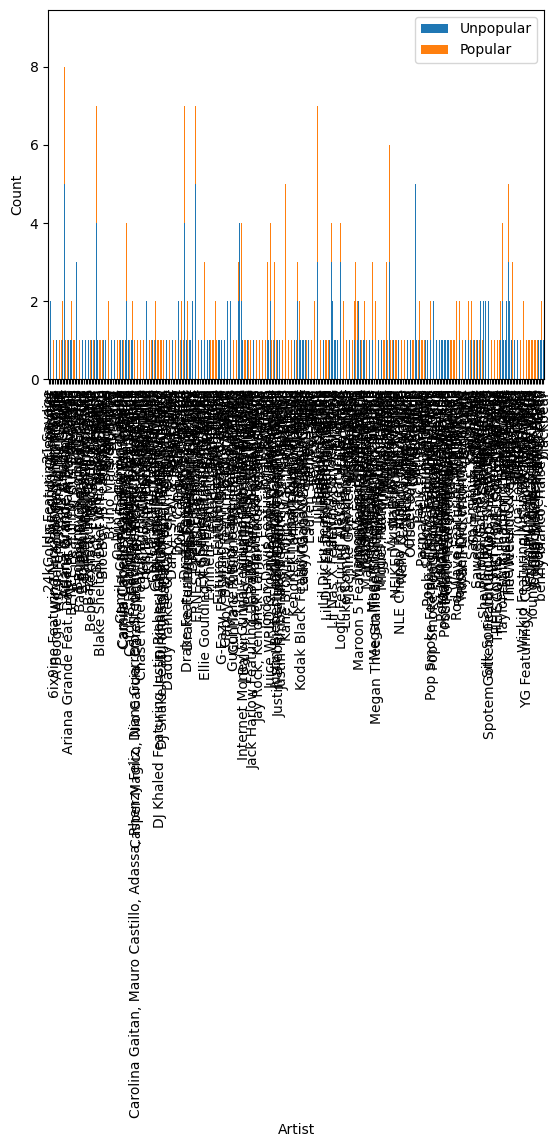

In [27]:
# create a bar plot of the number of popular and unpopular songs for each artist
fig, ax = plt.subplots()

# count the number of popular and unpopular songs for each artist
counts = df.groupby(['artist', 'popularity']).size().unstack(fill_value=0)

# plot the counts as a stacked bar chart
counts.plot(kind='bar', stacked=True, ax=ax)

# set the axis labels and legend
ax.set_xlabel('Artist')
ax.set_ylabel('Count')
ax.legend(['Unpopular', 'Popular'])

In [32]:
pip install youtube-dl

In [38]:
unique_song_names = df['title'].unique()
unique_song_names

array(['Heat Waves', 'As It Was', 'Stay', 'Easy On Me', 'Shivers',
       'First Class', 'Big Energy', 'Ghost', 'Super Gremlin',
       'Cold Heart (PNAU Remix)', 'Wait For U', 'About Damn Time',
       'Bad Habits', 'Thats What I Want', 'Enemy', 'Industry Baby',
       'abcdefu', 'Need To Know', 'Wasted On You', 'Me Porto Bonito',
       'Woman', 'Titi Me Pregunto',
       'Running Up That Hill (A Deal With God)',
       "We Don't Talk About Bruno", 'Late Night Talking',
       'I Like You (A Happier Song)', 'You Proof', 'Bad Habit', 'Sunroof',
       'One Right Now', 'Good 4 U', 'Numb Little Bug', 'Jimmy Cooks',
       "'Til You Can't", 'Fancy Like', 'The Kind Of Love We Make',
       "I Ain't Worried", 'Break My Soul', 'Something In The Orange',
       'Save Your Tears', 'Smokin Out The Window', 'Levitating',
       'In A Minute', 'Moscow Mule', 'You Right',
       'She Had Me At Heads Carolina', 'Vegas', 'Pushin P', 'Buy Dirt',
       'I Hate U', 'Boyfriend', 'Glimpse Of Us', 'Surf

In [ ]:
import subprocess
# iterate over the song names and download each song as audio
for song_name in unique_song_names:
    # construct the YouTube search query URL
    url = f'https://www.youtube.com/results?search_query={song_name.replace(" ", "+")}'

    # use subprocess to run youtube-dl to download the first search result as audio
    subprocess.run(['youtube-dl', '-o', f'{song_name}.m4a', '-f', 'bestaudio/best', f'{url}'])